In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from LinearRegression import partial_derivatives, gradient_descent, cost_function

# Univariable linear regression


In [2]:
data_folder = Path(r'C:\Users\anast\PycharmProjects\ML\machine-learning-ex1\machine-learning-ex1\ex1')

In [3]:
filename = data_folder/ 'ex1data1.txt'

In [4]:
dataset = np.loadtxt(filename, delimiter=',')

After loading the dataset, it is a good practice to plot the data so we can visualize the data

In [5]:
dataset.shape

(97, 2)

In [6]:
n = dataset.shape[1]-1 #getting features
x = dataset[:,0:n]
y = dataset[:,n:n+1]
m = len(y)

We study the shape of our dataset so we can know the number of features (in this case by default is one) and our image space

In [7]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Profit in $10,000s')

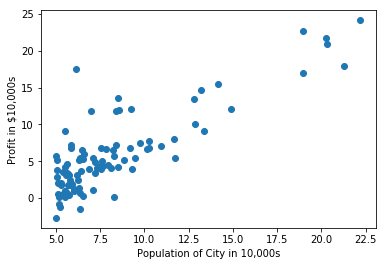

In [8]:
#Plotting the data with some context
plt.scatter(x, y)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

After plotting the dataset, we know have an idea on how the data looks. Let's proceed defining our cost function

In [9]:
xo = np.ones((m,1))

In [10]:
X = np.concatenate((xo, x), axis=1)

In [11]:
X.shape

(97, 2)

In [12]:
n =  X.shape[1]

In [13]:
n

2

In [14]:
theta = np.zeros(n)

In [15]:
theta

array([0., 0.])

In [16]:
cost_function(X, y, theta)

32.072733877455676

In [17]:
partials = partial_derivatives(X,y, theta)

In [18]:
partials.shape

(2,)

In [19]:
alpha = 0.01
iterations = 1500

In [20]:
theta_opt, theta_matrix = gradient_descent(X,y, theta, alpha, iterations, debugging = True)

In [21]:
theta_opt

array([-3.63029144,  1.16636235])

In [22]:
len(theta_matrix)

1500

In [23]:
len(theta_matrix[1])

2

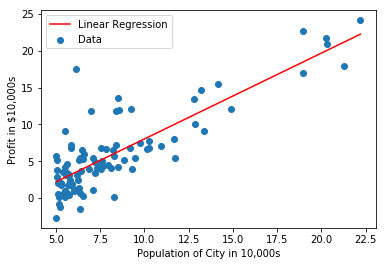

In [24]:
plt.scatter(X[:,1],y, label='Data')
#Generating data to plot the linear regression
x_dum = np.linspace(min(X[:,1]), max(X[:,1]), 100)
best_fit = lambda x:theta_opt[0] + theta_opt[1]*x
y_dum = [best_fit(i) for i in x_dum]
#End
plt.plot(x_dum, y_dum, color='r', label='Linear Regression')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend()

In [25]:
#Generating data from the path taken by the gradient descend
z_vals = []
theta0_vals = []
theta1_vals = []
for j in range(len(theta_matrix)):
    theta0_vals.append(theta_matrix[j][0])
    theta1_vals.append(theta_matrix[j][1])
    z_vals.append(cost_function(X, y, theta_matrix[j]))

In [26]:
#Generating data to plot the Cost function in general
theta0_dum = np.linspace(-5, 5,100)
theta1_dum = np.linspace(-4, 4,100)
THETA0, THETA1 = np.meshgrid(theta0_dum, theta1_dum)
Z = np.zeros((100,100))
for i in range(100):
    for j in range(100):
        Z[i,j] = cost_function(X,y,[THETA0[i,j], THETA1[i,j]])

In [27]:
len(theta_matrix)

1500

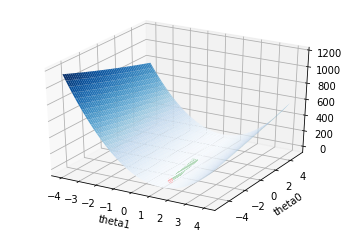

In [28]:
#Plotting the Cost function, the path, and the final answer
%matplotlib inline
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(THETA1, THETA0, Z, cmap='Blues')
ax.scatter(theta1_vals, theta0_vals, z_vals, color = 'g',marker=1)
ax.set_xlabel('theta1')
ax.set_ylabel('theta0')
ax.scatter(theta_opt[1],theta_opt[0], z_vals[len(z_vals)-1], color='r')